https://www.analyticsvidhya.com/blog/2019/01/build-image-classification-model-10-minutes/


https://towardsdatascience.com/train-image-recognition-ai-with-5-lines-of-code-8ed0bdd8d9ba


https://towardsdatascience.com/image-classification-python-keras-tutorial-kaggle-challenge-45a6332a58b8


https://www.geeksforgeeks.org/python-image-classification-using-keras/


https://www.tensorflow.org/tutorials/images/classification


https://docs.opencv.org/3.4/d3/dc1/tutorial_basic_linear_transform.html




# Setting up the images 

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import skimage as ski
import random
import os
import cv2
import imageio
import imutils
import matplotlib.pyplot as plt
import matplotlib.image as img
from tqdm.notebook import tqdm
from IPython.display import Image, HTML
from leo_module import path_to_image_html
import shutil
from sklearn.model_selection import train_test_split

pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)

In [4]:
data_dict = {'stockx_link': 'str, original link to the stock x page',
            'stockx_name': 'str, scraped name from the stock x',
            'type_1': 'str, scraped category from stock x',
            'type_2':'str, scraped 2nd category from stock x',
             'type_3': """str, created from a mix of type_1 and type_2 an overview of the shoe
                      one of the following values: 
                      [Basketball, Running, Air Force 1, Air Max VaporMax, Air Max,
                      Air Max 97, Air Max 90, Dunk Low, Air Max 1, Other,
                      Foamposite, Air Max 270, Air Max 95, Dunk High, SB,
                      Air Max Plus, Air Max 98, Training, Premium, Dunk Mid]""",
            'model':'str, index 1:4 from the stockx_name split on space',
            'right':'image pathway, sneaker facing right',
            'r_d':'image pathway, sneaker right 3/4',
            'straight':'image pathway, sneaker facing straight on',
            'l_d': 'image pathway, sneaker facing left 3/4',
            'left':'image pathway, sneaker facing left',
            'back':'image pathway, sneaker from the back',
            'style':'str, style code scraped from stock x',
            'colorway':'str, primary/secondary colour code scraped from stock x',
            'retailprice': 'float, price in dollars',
            'releasedate': 'datetime64[ns], release date of the shoe in the US',
            'primary_colour':"""str, Reduced form of the primary colour from the colorway column.
                            potential options are:
                            [black, white, blue, grey, neutral, red, yellow,
                           multi-color, green, pink, brown, orange, purple]"""}

In [163]:
stockx = pd.read_csv('stockx_main.csv',index_col=0)

In [164]:
stockx.type_3 = stockx.type_3.apply(lambda x: x.lower().replace(' ','_'))

In [165]:
# i decided it would be best to group all skate boarding shoes together, the dunk low,mid,high and sb
stockx.type_3 = stockx.type_3.apply(lambda x: 'skateboarding' if ('dunk' in x) | ('sb' in x) else x )

In [169]:
# Additionally I will group some of the smaller classed Air Maxes into the general Air Max Category
stockx.type_3 = stockx.type_3.apply(lambda x: 'air_max' if ('98' in x) | ('plus' in x) | ('270' in x)| ('95' in x) else x )

In [171]:
stockx.type_3.value_counts()

basketball          185
running             148
air_force_1         139
air_max             114
skateboarding        78
air_max_vapormax     75
air_max_97           59
air_max_90           56
air_max_1            43
other                21
foamposite           17
training              7
premium               2
Name: type_3, dtype: int64

In [44]:
stockx.to_csv('stockx_main.csv')

In [45]:
stockx = pd.read_csv('stockx_main.csv',index_col=0)

In [3]:
stockx.releasedate = pd.to_datetime(stockx.releasedate)

In [4]:
stockx.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 944 entries, 0 to 943
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   stockx_link     944 non-null    object        
 1   stockx_name     944 non-null    object        
 2   type_1          944 non-null    object        
 3   type_2          944 non-null    object        
 4   type_3          944 non-null    object        
 5   model           944 non-null    object        
 6   right           944 non-null    object        
 7   r_d             944 non-null    object        
 8   straight        944 non-null    object        
 9   l_d             944 non-null    object        
 10  left            944 non-null    object        
 11  back            944 non-null    object        
 12  style           942 non-null    object        
 13  colorway        944 non-null    object        
 14  retailprice     944 non-null    float64       
 15  releas

# EDA

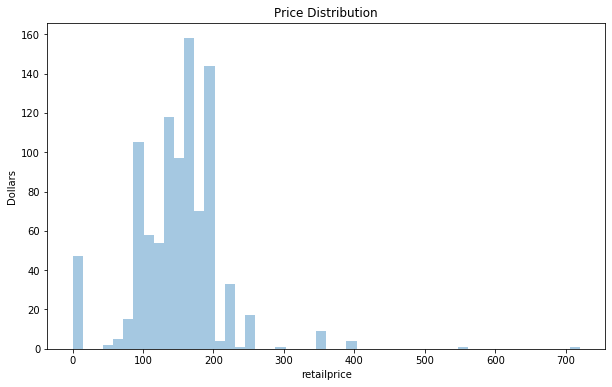

In [41]:
plt.figure(figsize=(10,6))
sns.distplot(stockx.retailprice,kde=False)
plt.title('Price Distribution')
plt.ylabel('Dollars')
plt.show()

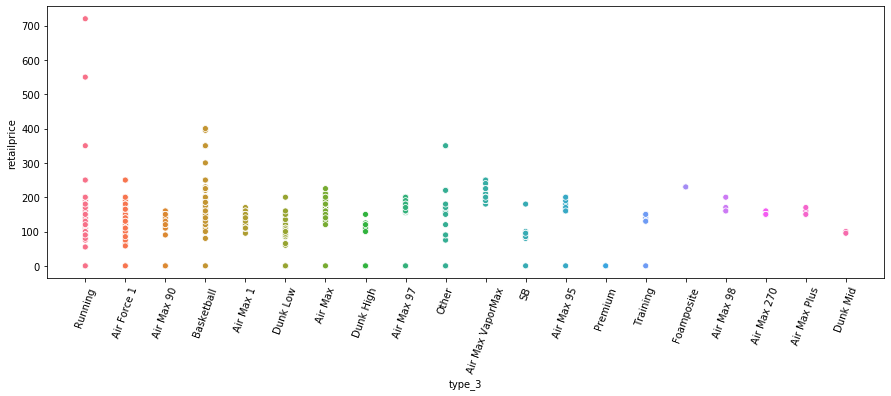

In [42]:
plt.figure(figsize=(15,5))
sns.scatterplot(stockx.type_3, stockx.retailprice, hue=stockx.type_3,legend=None)
plt.xticks(rotation=70)
plt.show()

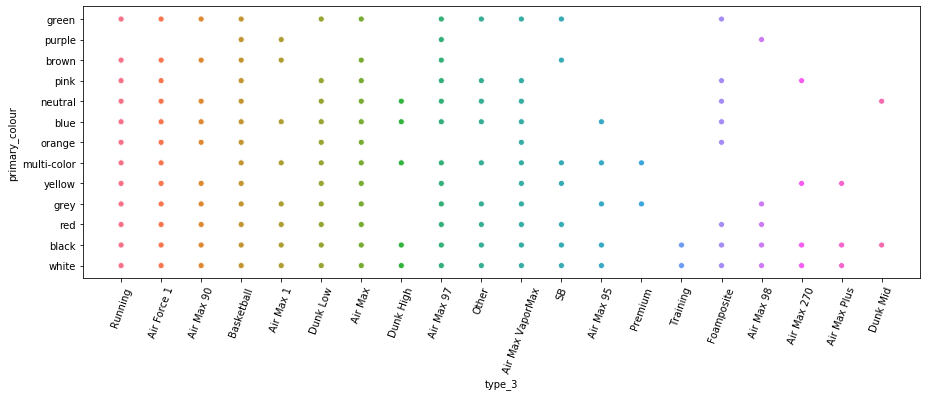

In [43]:
plt.figure(figsize=(15,5))
sns.scatterplot(stockx.type_3, stockx.primary_colour, hue=stockx.type_3, legend=None)
plt.xticks(rotation=70)
plt.show()

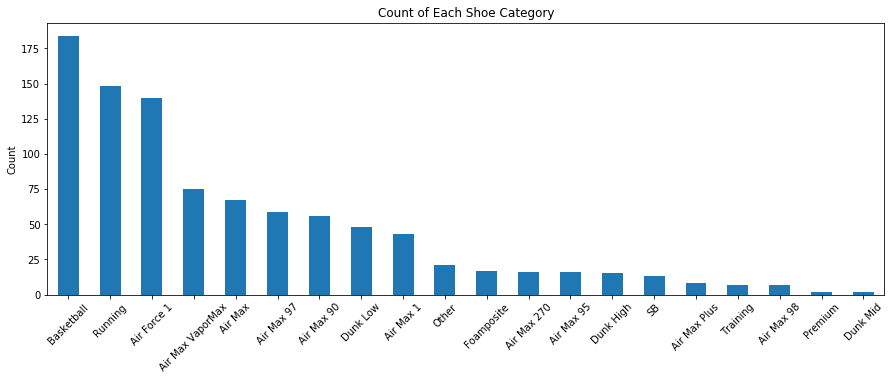

In [44]:
plt.figure(figsize=(15,5))
stockx.type_3.value_counts().plot(kind='bar')
plt.title('Count of Each Shoe Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [45]:
stockx.type_3.value_counts()

Basketball          184
Running             148
Air Force 1         140
Air Max VaporMax     75
Air Max              67
Air Max 97           59
Air Max 90           56
Dunk Low             48
Air Max 1            43
Other                21
Foamposite           17
Air Max 270          16
Air Max 95           16
Dunk High            15
SB                   13
Air Max Plus          8
Training              7
Air Max 98            7
Premium               2
Dunk Mid              2
Name: type_3, dtype: int64

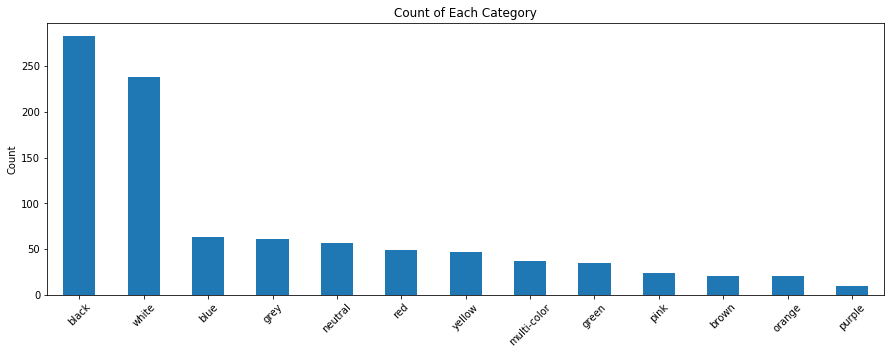

In [46]:
plt.figure(figsize=(15,5))
stockx.primary_colour.value_counts().plot(kind='bar')
plt.title('Count of Each Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

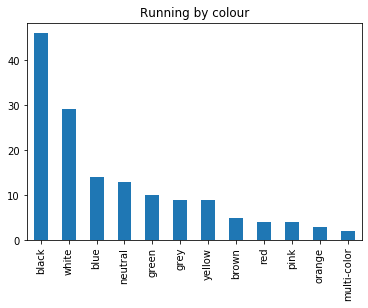

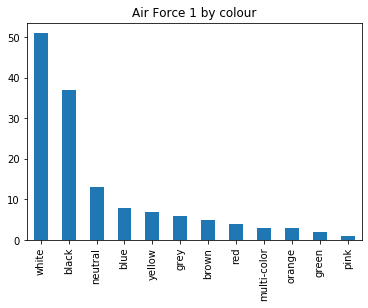

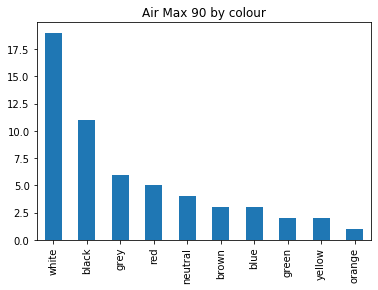

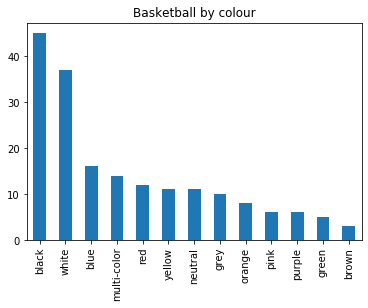

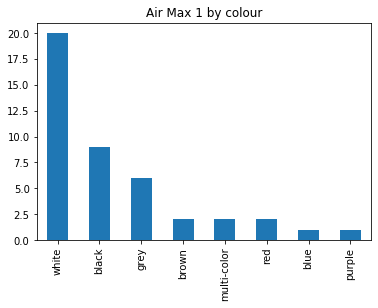

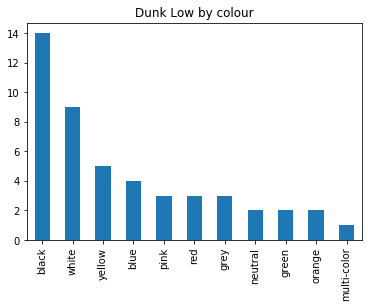

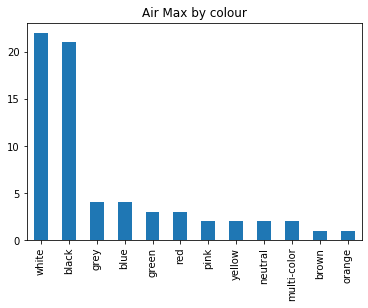

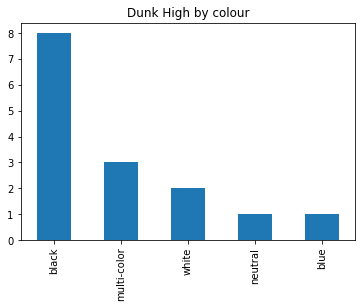

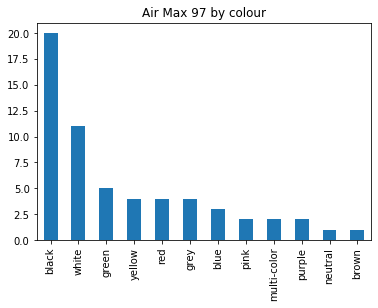

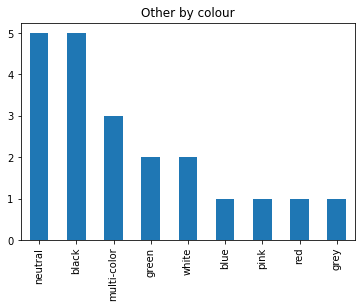

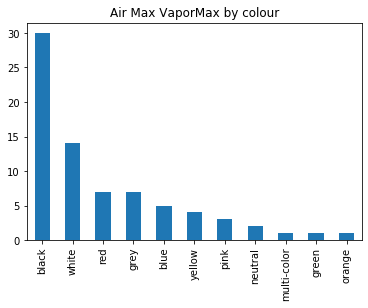

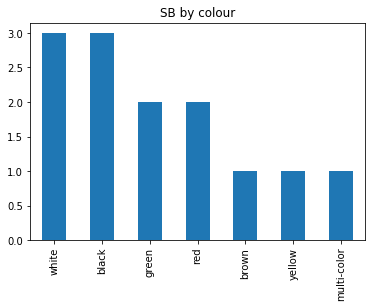

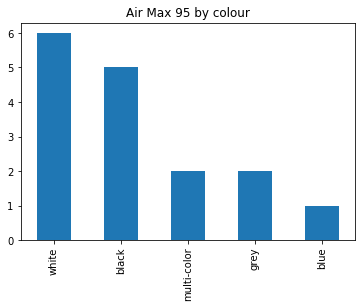

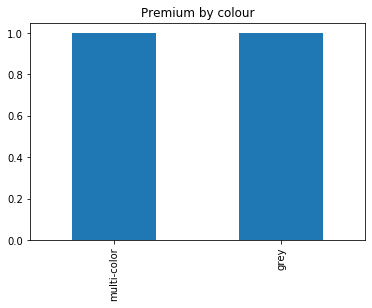

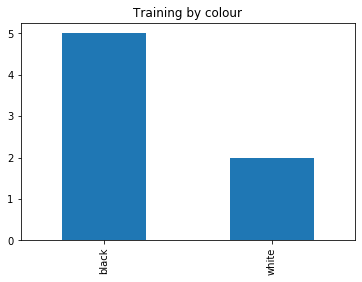

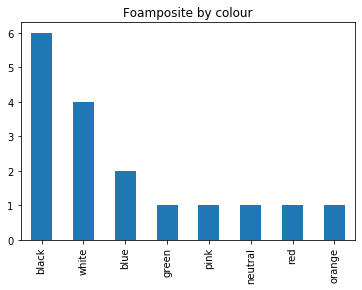

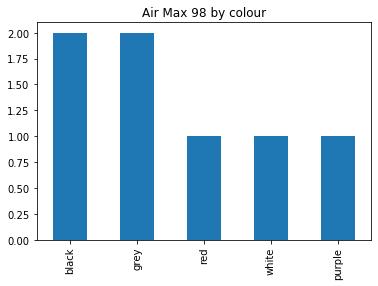

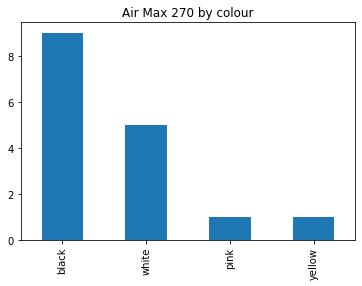

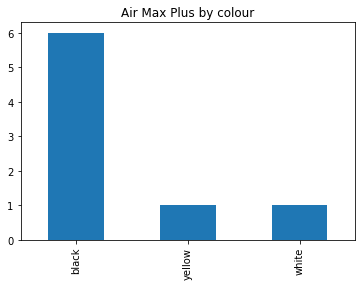

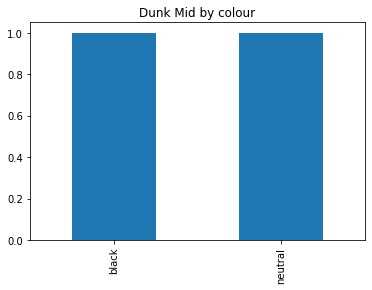

In [47]:
for shoe in stockx.type_3.unique():
    stockx[stockx.type_3 == shoe].primary_colour.value_counts().plot.bar()
    plt.title('{} by colour'.format(shoe))
    plt.show()

In [48]:
stockx.groupby(['type_3','primary_colour'])['right'].count()

type_3            primary_colour
Air Force 1       black             37
                  blue               8
                  brown              5
                  green              2
                  grey               6
                  multi-color        3
                  neutral           13
                  orange             3
                  pink               1
                  red                4
                  white             51
                  yellow             7
Air Max           black             21
                  blue               4
                  brown              1
                  green              3
                  grey               4
                  multi-color        2
                  neutral            2
                  orange             1
                  pink               2
                  red                3
                  white             22
                  yellow             2
Air Max 1         black        

In [49]:
stockx.type_3.value_counts()

Basketball          184
Running             148
Air Force 1         140
Air Max VaporMax     75
Air Max              67
Air Max 97           59
Air Max 90           56
Dunk Low             48
Air Max 1            43
Other                21
Foamposite           17
Air Max 270          16
Air Max 95           16
Dunk High            15
SB                   13
Air Max Plus          8
Training              7
Air Max 98            7
Premium               2
Dunk Mid              2
Name: type_3, dtype: int64

In [50]:
stockx.primary_colour.value_counts()

black          283
white          238
blue            63
grey            61
neutral         56
red             49
yellow          47
multi-color     37
green           35
pink            24
brown           21
orange          20
purple          10
Name: primary_colour, dtype: int64

# Increasing the differentiation between white trainers and the white background

In [ ]:
"""
Reduce the contrast of the image by making the brightest, whitest pixel something like 240 
instead of 255 so that the whites generally found within the image and within parts of the 
product are no longer pure white.
Put a 1 pixel wide white border around your image - that will allow the floodfill in the 
next step to "flow" all the way around the edge (even if the "product" touches the edges of the frame) 
and "seep" into the image from all borders/edges.
Floofdill your image starting at the top-left corner (which is necessarily pure white after step 2) 
and allow a tolerance of 10-20% when matching the white in case the background is off-white or slightly 
shadowed, and the white will flow into your image all around the edges until it reaches the product in the
centre.
See how many pure white pixels you have now - these are the background ones. 
The percentage of pure white pixels will give you an indicator of confidence in the image being a 
product on a whitish background.

"""

In [29]:
stockx.head()

stockx_link  \
0             https://stockx.com/nike-ld-waffle-sacai-white-nylon   
1             https://stockx.com/nike-ld-waffle-sacai-black-nylon   
2  https://stockx.com/nike-air-force-1-low-supreme-box-logo-white   
3                    https://stockx.com/nike-dunk-low-sp-syracuse   
4       https://stockx.com/nike-air-max-90-reverse-duck-camo-2020   

                                stockx_name      type_1   type_2       type_3  \
0          Nike LD Waffle Sacai White Nylon       Other  Running      Running   
1          Nike LD Waffle Sacai Black Nylon       Other  Running      Running   
2        Nike Air Force 1 Low Supreme White   Air Force        1  Air Force 1   
3          Nike Dunk Low SP Syracuse (2020)  Basketball    Other   Basketball   
4  Nike Air Max 90 Reverse Duck Camo (2020)     Air Max       90   Air Max 90   

             model  \
0  LD Waffle Sacai   
1  LD Waffle Sacai   
2      Air Force 1   
3         Dunk Low   
4       Air Max 90   

                                                           right  \
0        images/right/Nike_LD_Waffle_Sacai_White_Nylon_right.jpg   
1        images/right/Nike_LD_Waffle_Sacai_Black_Nylon_right.jpg   
2      images/right/Nike_Air_Force_1_Low_Supreme_White_right.jpg   
3                            Nike_Dunk_Low_SP_Syracuse_right.jpg   
4  images/right/Nike_Air_Max_90_Reverse_Duck_Camo_2020_right.jpg   

                                                         r_d  \
0        images/r_d/Nike_LD_Waffle_Sacai_White_Nylon_r_d.jpg   
1        images/r_d/Nike_LD_Waffle_Sacai_Black_Nylon_r_d.jpg   
2      images/r_d/Nike_Air_Force_1_Low_Supreme_White_r_d.jpg   
3                          Nike_Dunk_Low_SP_Syracuse_r_d.jpg   
4  images/r_d/Nike_Air_Max_90_Reverse_Duck_Camo_2020_r_d.jpg   

                                                              straight  \
0        images/straight/Nike_LD_Waffle_Sacai_White_Nylon_straight.jpg   
1        images/straight/Nike_LD_Waffle_Sacai_Black_Nylon_straight.jpg   
2      images/straight/Nike_Air_Force_1_Low_Supreme_White_straight.jpg   
3                               Nike_Dunk_Low_SP_Syracuse_straight.jpg   
4  images/straight/Nike_Air_Max_90_Reverse_Duck_Camo_2020_straight.jpg   

                                                         l_d  \
0        images/l_d/Nike_LD_Waffle_Sacai_White_Nylon_l_d.jpg   
1        images/l_d/Nike_LD_Waffle_Sacai_Black_Nylon_l_d.jpg   
2      images/l_d/Nike_Air_Force_1_Low_Supreme_White_l_d.jpg   
3                          Nike_Dunk_Low_SP_Syracuse_l_d.jpg   
4  images/l_d/Nike_Air_Max_90_Reverse_Duck_Camo_2020_l_d.jpg   

                                                          left  \
0        images/left/Nike_LD_Waffle_Sacai_White_Nylon_left.jpg   
1        images/left/Nike_LD_Waffle_Sacai_Black_Nylon_left.jpg   
2      images/left/Nike_Air_Force_1_Low_Supreme_White_left.jpg   
3                           Nike_Dunk_Low_SP_Syracuse_left.jpg   
4  images/left/Nike_Air_Max_90_Reverse_Duck_Camo_2020_left.jpg   

                                                          back       style  \
0        images/back/Nike_LD_Waffle_Sacai_White_Nylon_back.jpg  BV0073-101   
1        images/back/Nike_LD_Waffle_Sacai_Black_Nylon_back.jpg  BV0073-002   
2      images/back/Nike_Air_Force_1_Low_Supreme_White_back.jpg  CU9225-100   
3                           Nike_Dunk_Low_SP_Syracuse_back.jpg  CU1726-101   
4  images/back/Nike_Air_Max_90_Reverse_Duck_Camo_2020_back.jpg  CW6024-600   

                                 colorway  retailprice releasedate  \
0                             White/White        160.0  2020-03-10   
1                             Black/Black        160.0  2020-03-10   
2                       White/White-White         96.0  2020-03-05   
3                            WHITE/ORANGE        100.0  03/14/2020   
4  Infrared/Black-Dark Sage-Baroque Brown        140.0  2020-03-26   

  primary_colour  
0          white  
1          black  
2          white  
3    multi-color  
4            

In [3]:
white_subset = stockx[stockx.primary_colour =='white'].reset_index(drop=True)

In [6]:
white_subset

stockx_link  \
0                                 https://stockx.com/nike-ld-waffle-sacai-white-nylon   
1                      https://stockx.com/nike-air-force-1-low-supreme-box-logo-white   
2                                        https://stockx.com/nike-dunk-low-sp-kentucky   
3                               https://stockx.com/nike-dunk-low-off-white-pine-green   
4                      https://stockx.com/nike-air-max-1-anniversary-red-2017-restock   
5                           https://stockx.com/nike-sb-dunk-low-infrared-orange-label   
6                                  https://stockx.com/nike-ld-waffle-sacai-white-grey   
7                                https://stockx.com/nike-blazer-high-sacai-snow-beach   
8                          https://stockx.com/nike-sb-dunk-high-paul-rodriguez-mexico   
9        https://stockx.com/nike-air-max-90-30th-anniversary-white-particle-grey-volt   
10                               https://stockx.com/nike-blazer-high-sacai-white-grey   
11                       https://stockx.com/nike-air-force-1-low-day-of-the-dead-2019   
12                                          https://stockx.com/nike-sb-dunk-low-parra   
13                          https://stockx.com/nike-air-force-1-low-retro-ivory-snake   
14                       https://stockx.com/nike-zoom-terra-kiger-5-off-white-white-w   
15                        https://stockx.com/nike-air-force-1-gore-tex-high-white-ice   
16                            https://stockx.com/nike-air-presto-off-white-white-2018   
17                                        https://stockx.com/nike-kobe-5-protro-chaos   
18                                    https://stockx.com/nike-air-max-1-tinker-sketch   
19                              https://stockx.com/nike-react-presto-undercover-white   
20                                          https://stockx.com/nike-sb-dunk-low-ben-g   
21                           https://stockx.com/nike-air-max-90-recraft-hyper-grape-w   
22                               https://stockx.com/nike-air-force-1-low-what-the-nyc   
23       https://stockx.com/nike-tailwind-79-og-stranger-things-independence-day-pack   
24                                https://stockx.com/nike-air-vapormax-off-white-2018   
25                             https://stockx.com/nike-air-max-1-anniversary-obsidian   
26                                         https://stockx.com/nike-zoom-fly-off-white   
27                          https://stockx.com/nike-air-force-1-low-roc-a-fella-af100   
28                                       https://stockx.com/nike-air-max-97-off-white   
29                                   https://stockx.com/nike-air-max-1-sport-red-2017   
30                  https://stockx.com/nike-air-force-1-low-canvas-travis-scott-af100   
31                   https://stockx.com/nike-air-max-90-undefeated-white-optic-yellow   
32                            https://stockx.com/nike-nike-air-max-1-sport-royal-2017   
33                                    https://stockx.com/nike-air-presto-acronym-volt   
34                                  https://stockx.com/nike-dunk-sb-low-what-the-dunk   
35                   https://stockx.com/nike-dunk-sb-low-supreme-ny-white-cement-2002   
36                                 https://stockx.com/nike-air-max-90-recraft-royal-w   
37                                   https://stockx.com/nike-air-force-1-low-white-07   
38                                 https://stockx.com/nike-air-max-97-white-wolf-grey   
39                              https://stockx.com/nike-air-more-uptempo-olympic-2020   
40                                   https://stockx.com/nike-lebron-17-low-tune-squad   
41                                      https://stockx.com/nike-air-force-1-dna-white   
42                                    https://stockx.com/nike-air-vapormax-plus-white   
43                                     https://stockx.com/nike-air-max-95-pollen-rise   
44                               https://stockx.com/nike-air-force-1-

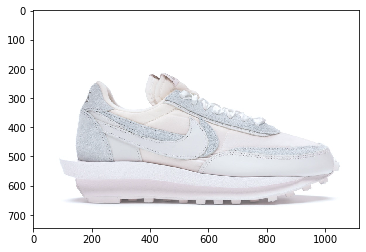

In [8]:
image = cv2.imread(stockx.right[0]) # path = path to your file
bin = cv2.inRange(image, (255, 255, 255), (255, 255,255))
cv2.bitwise_not(bin, bin)
cnts = cv2.findContours(bin.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
cnts = sorted(cnts, key = cv2.contourArea, reverse = True)
rect = cv2.boundingRect(cnts[0])
plt.imshow(cv2.rectangle(image, rect, (0,255,0), 1))

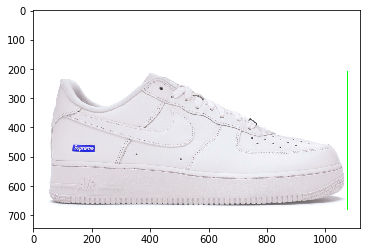

In [10]:
image = cv2.imread(stockx.right[2]) # path = path to your file
bin = cv2.inRange(image, (255, 255, 255), (255, 255,255))
cv2.bitwise_not(bin, bin)
cnts = cv2.findContours(bin.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
cnts = sorted(cnts, key = cv2.contourArea, reverse = True)
rect = cv2.boundingRect(cnts[0])
plt.imshow(cv2.rectangle(image, rect, (0,255,0), 1))

In [ ]:
#-----Reading the image-----------------------------------------------------
img = cv2.imread(white_subset.right[0], 1)
cv2.imshow("img",img) 

#-----Converting image to LAB Color model----------------------------------- 
lab= cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
cv2.imshow("lab",lab)

#-----Splitting the LAB image to different channels-------------------------
l, a, b = cv2.split(lab)
cv2.imshow('l_channel', l)
cv2.imshow('a_channel', a)
cv2.imshow('b_channel', b)

In [ ]:
#-----Applying CLAHE to L-channel-------------------------------------------
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
cl = clahe.apply(l)
cv2.imshow('CLAHE output', cl)

#-----Merge the CLAHE enhanced L-channel with the a and b channel-----------
limg = cv2.merge((cl,a,b))
cv2.imshow('limg', limg)

#-----Converting image from LAB Color model to RGB model--------------------
final = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)
cv2.imshow('final', final)

#_____END_____#

In [4]:

# Open a typical 24 bit color image. For this kind of image there are
# 8 bits (0 to 255) per color channel
img = cv2.imread(white_subset.right[0])  # mandrill reference image from USC SIPI

s = 128
img = cv2.resize(img, (s,s), 0, 0, cv2.INTER_AREA)

def apply_brightness_contrast(input_img, brightness = 0, contrast = 0):

    if brightness != 0:
        if brightness > 0:
            shadow = brightness
            highlight = 255
        else:
            shadow = 0
            highlight = 255 + brightness
        alpha_b = (highlight - shadow)/255
        gamma_b = shadow

        buf = cv2.addWeighted(input_img, alpha_b, input_img, 0, gamma_b)
    else:
        buf = input_img.copy()

    if contrast != 0:
        f = 131*(contrast + 127)/(127*(131-contrast))
        alpha_c = f
        gamma_c = 127*(1-f)

        buf = cv2.addWeighted(buf, alpha_c, buf, 0, gamma_c)

    return buf


font = cv2.FONT_HERSHEY_SIMPLEX
fcolor = (0,0,0)

blist = [0, -127, 127,   0,  0, 64] # list of brightness values
clist = [0,    0,   0, -64, 64, 64] # list of contrast values


out = np.zeros((s*2, s*3, 3), dtype = np.uint8)

for i, b in enumerate(blist):
    c = clist[i]
    print('b, c:  ', b,', ',c)
    row = s*int(i/3)
    col = s*(i%3)

    print('row, col:   ', row, ', ', col)

    out[row:row+s, col:col+s] = apply_brightness_contrast(img, b, c)
    msg = 'b %d' % b
    cv2.putText(out,msg,(col,row+s-22), font, .7, fcolor,1,cv2.LINE_AA)
    msg = 'c %d' % c
    cv2.putText(out,msg,(col,row+s-4), font, .7, fcolor,1,cv2.LINE_AA)

    cv2.putText(out, 'OpenCV',(260,30), font, 1.0, fcolor,2,cv2.LINE_AA)

cv2.imwrite('out.png', out)

b, c:   0 ,  0
row, col:    0 ,  0
b, c:   -127 ,  0
row, col:    0 ,  128
b, c:   127 ,  0
row, col:    0 ,  256
b, c:   0 ,  -64
row, col:    128 ,  0
b, c:   0 ,  64
row, col:    128 ,  128
b, c:   64 ,  64
row, col:    128 ,  256


True

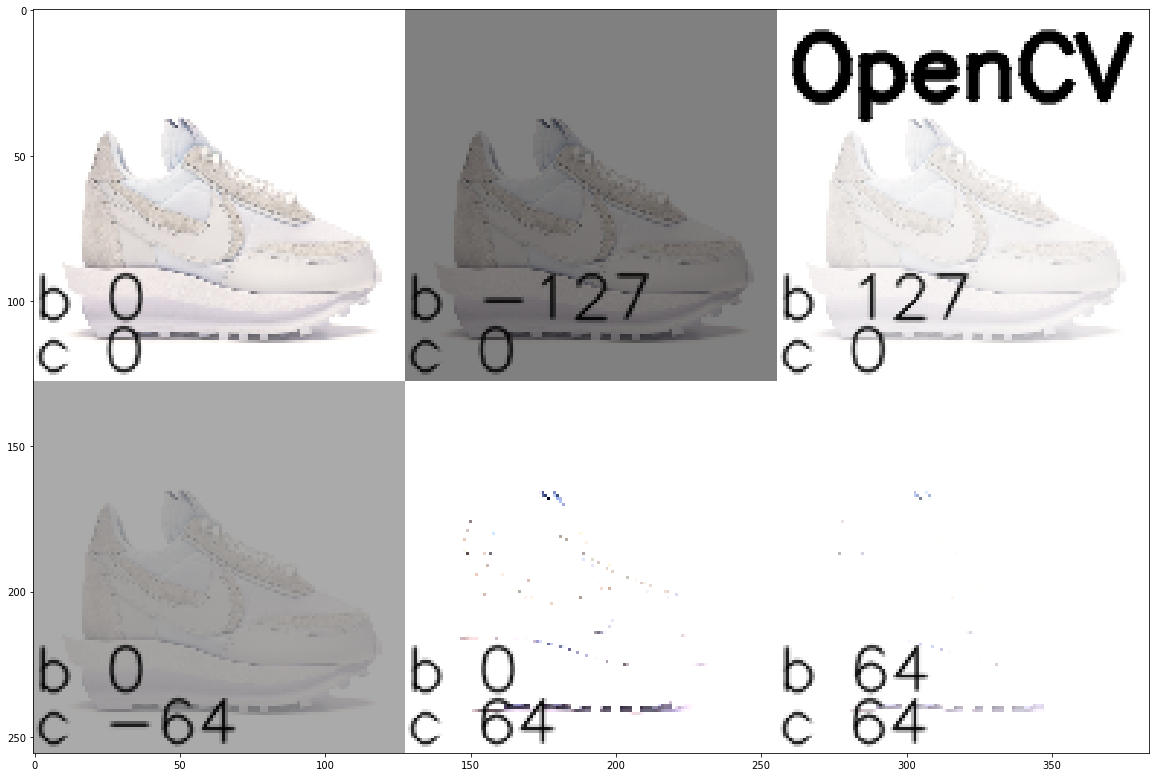

In [8]:
plt.figure(figsize=(20,20))
plt.imshow(ski.io.imread('out.png'))

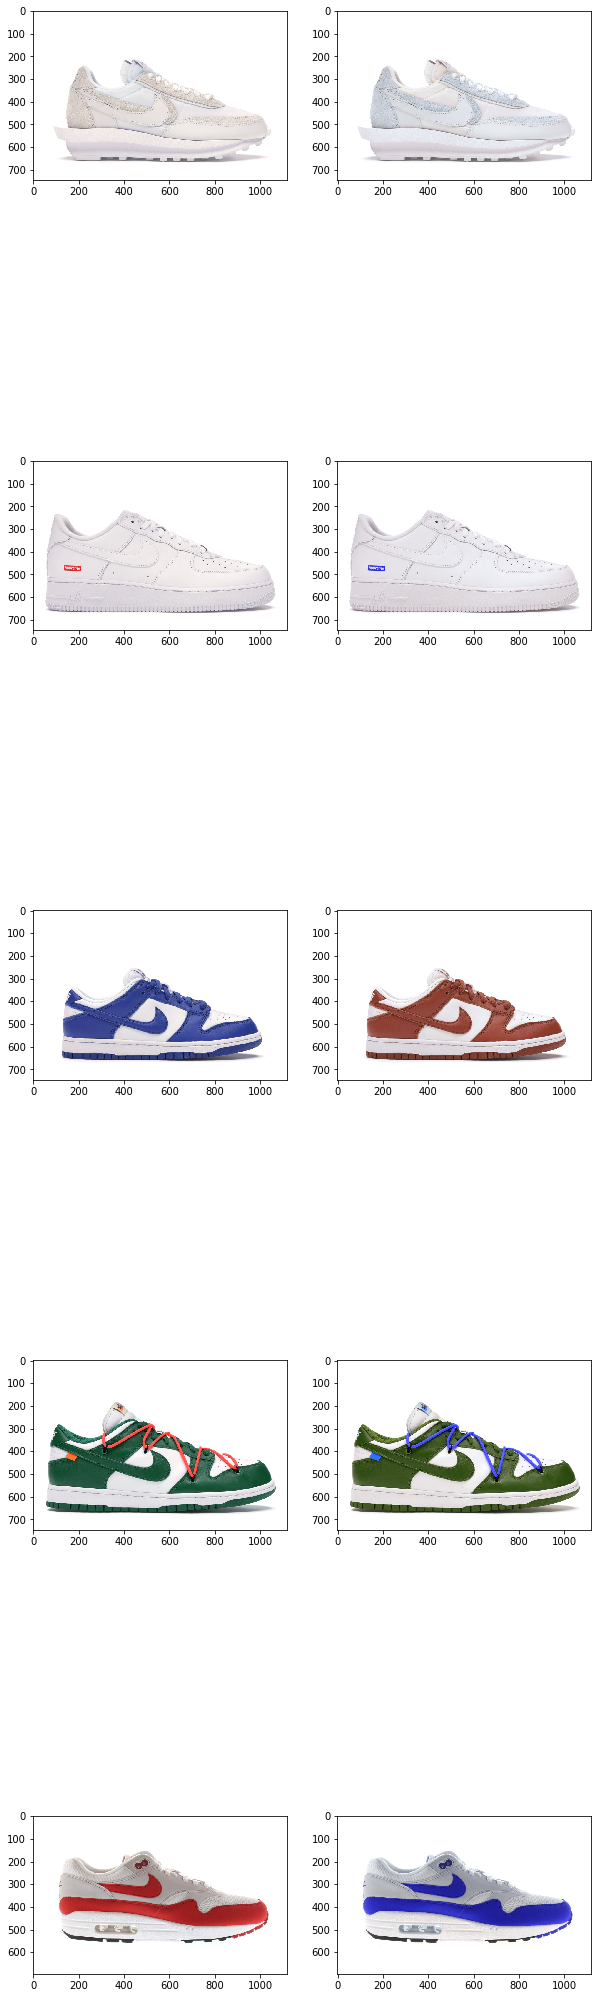

In [9]:
fig, ax = plt.subplots(ncols=2, nrows=5, figsize=(10,40))

for a in range(5):
    image = cv2.imread(white_subset.right[a]) # path = path to your file
    bin = cv2.inRange(image, (0, 0, 0), (0, 0,0))
    cv2.bitwise_not(bin, bin)

    ax[a,0].imshow(ski.io.imread(white_subset.right[a]))
    ax[a,1].imshow(image)
plt.show()

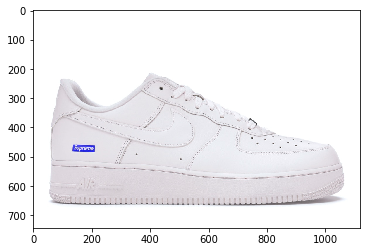

In [36]:
def differentiate(image):
    image = cv2.imread(stockx.right[2]) # path = path to your file
    bin = cv2.inRange(image, (255, 255, 255), (255, 255,255))
    cv2.bitwise_not(bin, bin)
    
    return image

plt.imshow(differentiate(stockx.right[2]))

In [ ]:
# I will add this function into my image augmentation class

# Splitting the Data and moving the images into their own training set structure

In [46]:
stockx_data = stockx[(stockx.type_3 != 'training') & (stockx.type_3 !='premium') ]

In [77]:
data =  stockx_data[['stockx_name','right','r_d','straight','l_d','left','back']]

In [78]:
target = stockx_data[['type_3']]

In [79]:
x_train, x_test, y_train, y_test = train_test_split(data, target, stratify=target, test_size=.25, random_state=2)

In [80]:
print('total training images:', x_train.shape[0])

print('total validation images:', x_test.shape[0])

total training images: 701
total validation images: 234


In [85]:
to_move = pd.merge(x_train, y_train, on=x_train.index,left_index=True, right_index=True )

In [52]:
to_move.head(5)

right  \
298      images/right/Nike_Air_Force_1_Low_'07_White_Obsidian_right.jpg   
874               images/right/Nike_Air_Max_Plus_Triple_Black_right.jpg   
491  images/right/Nike_Air_Foamposite_One_Shattered_Backboard_right.jpg   
453     images/right/Nike_Air_Max_97_All-Over_Print_Black_Red_right.jpg   
331                        images/right/Nike_Air_Force_1_Type_right.jpg   

                                                                r_d  \
298      images/r_d/Nike_Air_Force_1_Low_'07_White_Obsidian_r_d.jpg   
874               images/r_d/Nike_Air_Max_Plus_Triple_Black_r_d.jpg   
491  images/r_d/Nike_Air_Foamposite_One_Shattered_Backboard_r_d.jpg   
453     images/r_d/Nike_Air_Max_97_All-Over_Print_Black_Red_r_d.jpg   
331                        images/r_d/Nike_Air_Force_1_Type_r_d.jpg   

                                                                     straight  \
298      images/straight/Nike_Air_Force_1_Low_'07_White_Obsidian_straight.jpg   
874               images/straight/Nike_Air_Max_Plus_Triple_Black_straight.jpg   
491  images/straight/Nike_Air_Foamposite_One_Shattered_Backboard_straight.jpg   
453     images/straight/Nike_Air_Max_97_All-Over_Print_Black_Red_straight.jpg   
331                        images/straight/Nike_Air_Force_1_Type_straight.jpg   

                                                                l_d  \
298      images/l_d/Nike_Air_Force_1_Low_'07_White_Obsidian_l_d.jpg   
874               images/l_d/Nike_Air_Max_Plus_Triple_Black_l_d.jpg   
491  images/l_d/Nike_Air_Foamposite_One_Shattered_Backboard_l_d.jpg   
453     images/l_d/Nike_Air_Max_97_All-Over_Print_Black_Red_l_d.jpg   
331                        images/l_d/Nike_Air_Force_1_Type_l_d.jpg   

                                                                 left  \
298      images/left/Nike_Air_Force_1_Low_'07_White_Obsidian_left.jpg   
874               images/left/Nike_Air_Max_Plus_Triple_Black_left.jpg   
491  images/left/Nike_Air_Foamposite_One_Shattered_Backboard_left.jpg   
453     images/left/Nike_Air_Max_97_All-Over_Print_Black_Red_left.jpg   
331                        images/left/Nike_Air_Force_1_Type_left.jpg   

                                                                 back  \
298      images/back/Nike_Air_Force_1_Low_'07_White_Obsidian_back.jpg   
874               images/back/Nike_Air_Max_Plus_Triple_Black_back.jpg   
491  images/back/Nike_Air_Foamposite_One_Shattered_Backboard_back.jpg   
453     images/back/Nike_Air_Max_97_All-Over_Print_Black_Red_back.jpg   
331                        images/back/Nike_Air_Force_1_Type_back.jpg   

          type_3  
298  air_force_1  
874      air_max  
491   foamposite  
453   air_max_97  
331  air_force_1

In [53]:
to_move[to_move.l_d =='Nike_Dunk_Low_SP_Syracuse_back.jpg']

Empty DataFrame
Columns: [right, r_d, straight, l_d, left, back, type_3]
Index: []

In [54]:
for row in to_move.index:
    for col in to_move.columns[:-1]:
        shutil.copy(to_move[col][row], "train_set/{}/".format(to_move.type_3[row]))

In [55]:
to_move_test = pd.merge(x_test, y_test, on=x_test.index,left_index=True, right_index=True )

In [56]:
for row in to_move_test.index:
    print(row)
    for col in to_move_test.columns[:-1]:
        shutil.copy(to_move_test[col][row], "test_set/{}/".format(to_move_test.type_3[row]))

580
241
499
476
50
845
351
93
468
125
687
1
391
501
675
528
346
611
309
478
856
111
86
576
385
923
321
598
931
366
22
552
515
275
302
692
143
510
420
707
68
766
411
118
210
526
928
708
660
717
157
512
477
205
404
889
85
521
273
878
246
267
664
700
108
863
446
857
226
286
906
630
270
52
695
683
789
294
672
480
671
444
407
38
791
497
288
390
129
792
222
435
373
240
935
590
322
197
532
661
135
685
141
942
742
462
454
191
31
790
606
37
550
166
183
147
40
754
484
493
618
745
508
432
278
609
209
589
832
767
599
743
296
57
523
737
701
794
395
365
312
586
640
559
456
919
167
897
578
795
607
92
293
463
787
155
126
21
277
84
651
867
854
443
516
326
14
698
492
287
885
25
176
824
746
8
15
798
514
238
841
614
691
485
177
721
805
245
217
215
631
242
317
237
418
29
860
926
149
256
113
305
829
186
605
876
541
820
223
562
359
937
300
694
295
608
836
439
704
732
571
152
102
470
883
686
943
397
324
49
638
239
799
561


# Image Augmentation

In [51]:
# Augment the following colors until they have the same amount as black and white ~ 250 :
# blue, grey, neutral, red, yellow, multi-color, green, pink, brown, orange, purple  

In [57]:
class image_agumentation():
    
    def anti_clockwise(self, image):
        angle = np.random.randint(0,25)
        return ski.transform.rotate(image, -angle)
    
    def clockwise(self, image):
        angle = np.random.randint(0,25)
        return ski.transform.rotate(image,angle)
    
    def h_flip(self, image):
        return np.fliplr(image)
    
    def v_flip(self, image):
        return np.flipud(image)
    
    def add_noise(self, image):
        return ski.util.random_noise(image)
    
    def blur_image(self, image):
        return cv2.GaussianBlur(image, (9,9),7)


In [58]:
imag_aug = image_agumentation()

In [54]:
stockx.right[0]

'images/right/Nike_LD_Waffle_Sacai_White_Nylon_right.jpg'

In [112]:
clockwise_test = imag_aug.anti_clockwise(ski.io.imread(stockx.right[0]))

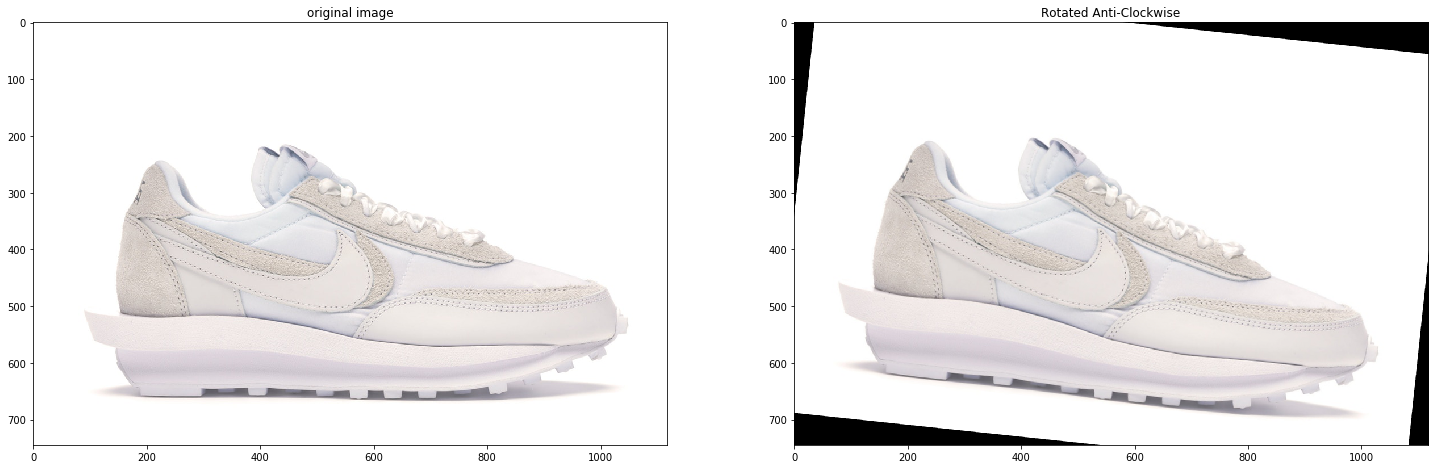

In [113]:
plt.figure(figsize=(25,25))
plt.subplot(1,2,1)
plt.title('original image')
plt.imshow(ski.io.imread(stockx.right[0]))
plt.subplot(1,2,2)
plt.title('Rotated Anti-Clockwise')
plt.imshow(clockwise_test)
plt.show()

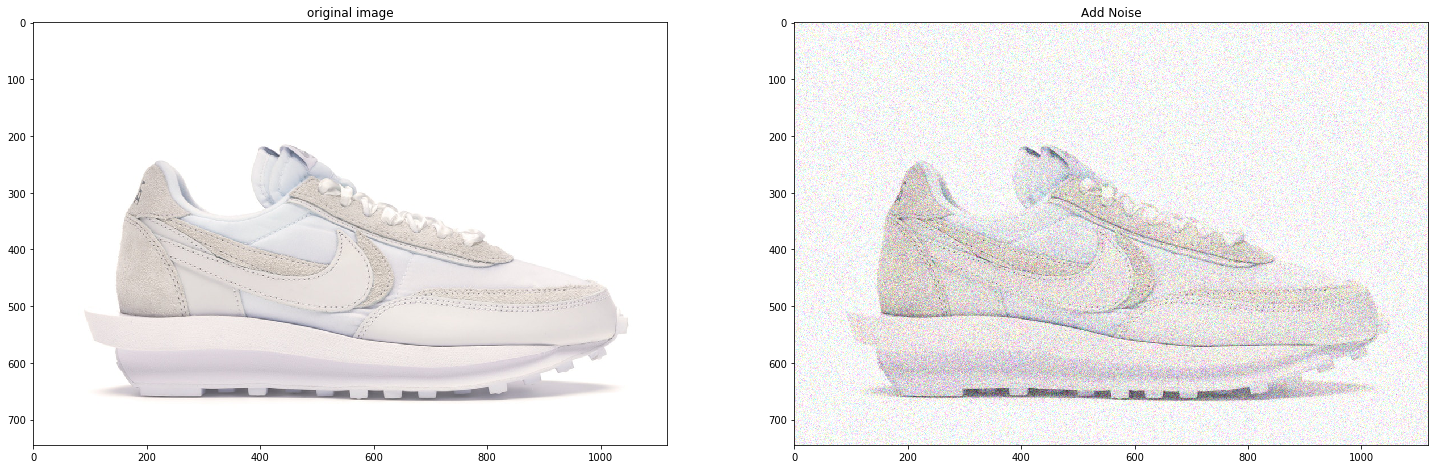

In [58]:
plt.figure(figsize=(25,25))
plt.subplot(1,2,1)
plt.title('original image')
plt.imshow(ski.io.imread(stockx.right[0]))
plt.subplot(1,2,2)
plt.title('Add Noise')
plt.imshow(imag_aug.add_noise(ski.io.imread(stockx.right[0])))
plt.show()

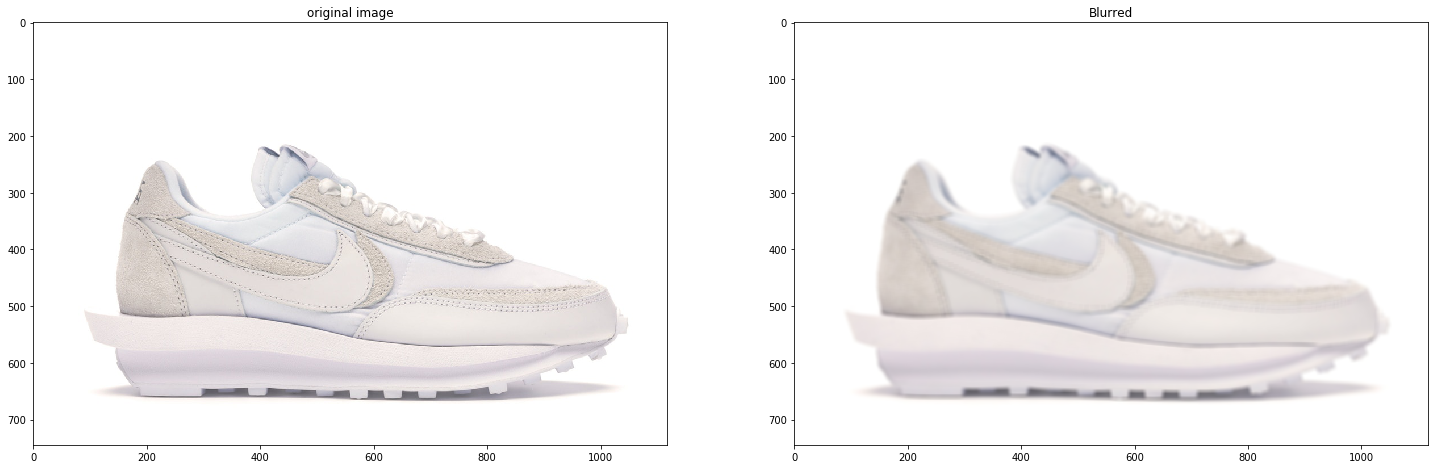

In [59]:
plt.figure(figsize=(25,25))
plt.subplot(1,2,1)
plt.title('original image')
plt.imshow(ski.io.imread(stockx.right[0]))
plt.subplot(1,2,2)
plt.title('Blurred')
plt.imshow(imag_aug.blur_image(ski.io.imread(stockx.right[0])))
plt.show()

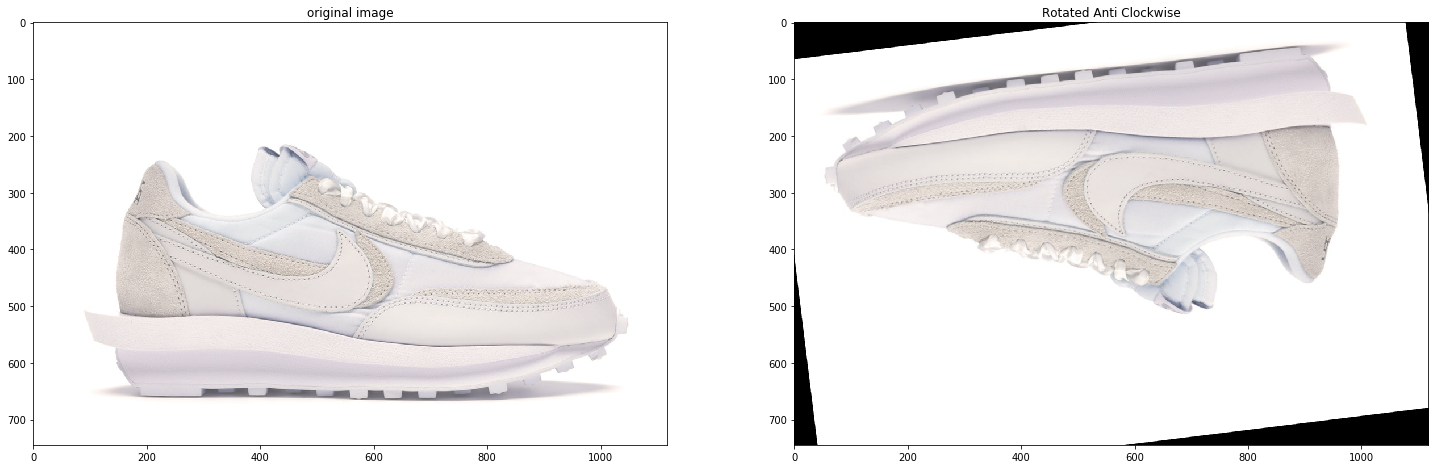

In [60]:
plt.figure(figsize=(25,25))
plt.subplot(1,2,1)
plt.title('original image')
plt.imshow(ski.io.imread(stockx.right[0]))
plt.subplot(1,2,2)
plt.title('Rotated Anti Clockwise')
plt.imshow(imag_aug.anti_clockwise(ski.io.imread(stockx.right[0])))
plt.show()

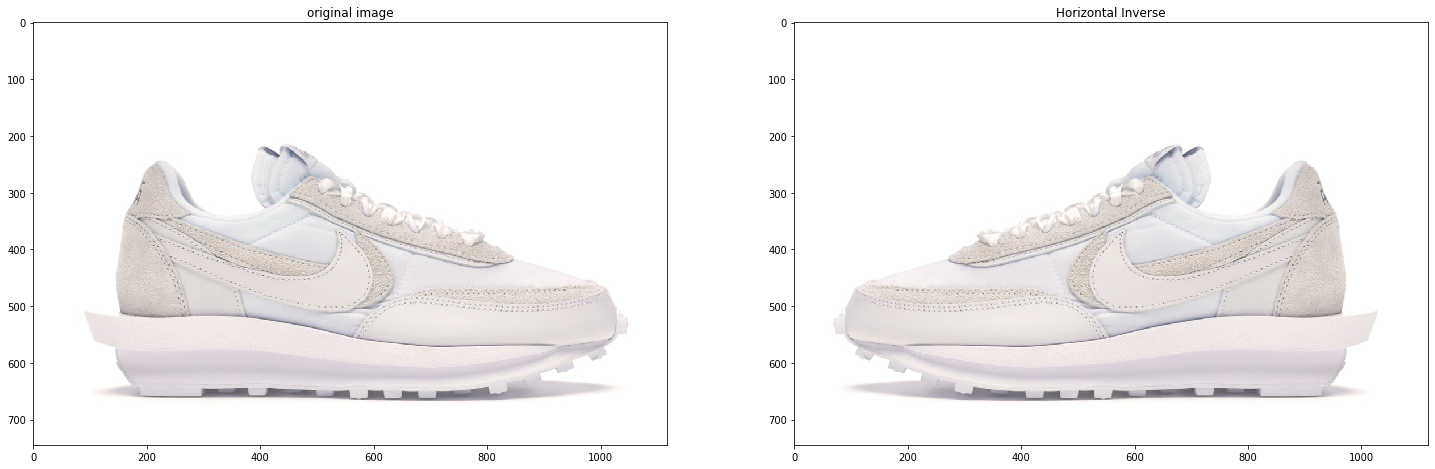

In [61]:
plt.figure(figsize=(25,25))
plt.subplot(1,2,1)
plt.title('original image')
plt.imshow(ski.io.imread(stockx.right[0]))
plt.subplot(1,2,2)
plt.title('Horizontal Inverse')
plt.imshow(imag_aug.h_flip(ski.io.imread(stockx.right[0])))
plt.show()

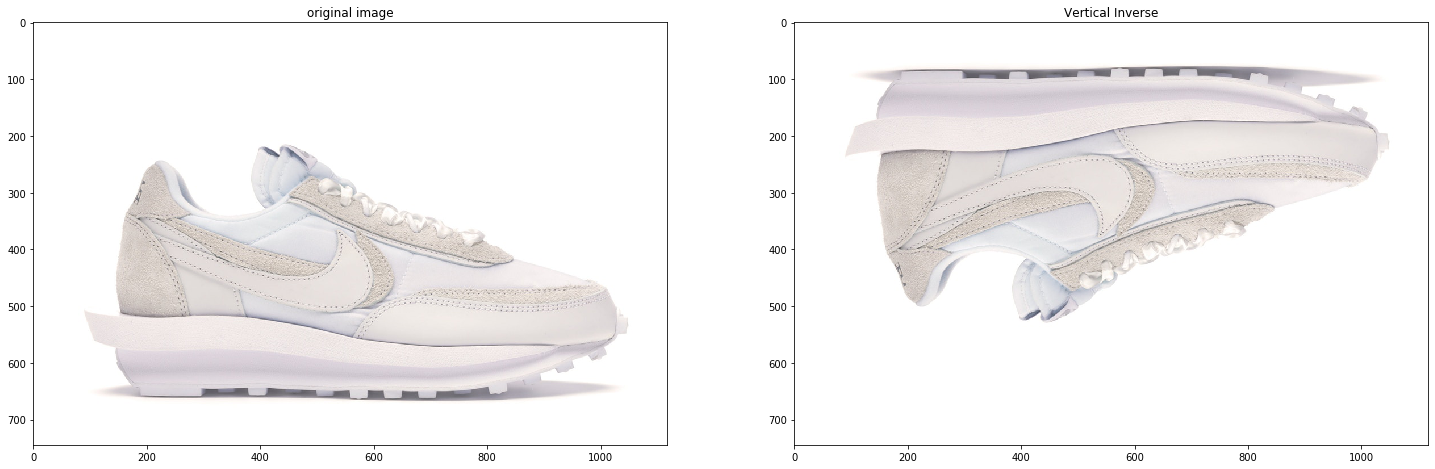

In [62]:
plt.figure(figsize=(25,25))
plt.subplot(1,2,1)
plt.title('original image')
plt.imshow(ski.io.imread(stockx.right[0]))
plt.subplot(1,2,2)
plt.title('Vertical Inverse')
plt.imshow(imag_aug.v_flip(ski.io.imread(stockx.right[0])))
plt.show()

# Augmentation

stockx_link  \
0                                 https://stockx.com/nike-ld-waffle-sacai-white-nylon   
1                                 https://stockx.com/nike-ld-waffle-sacai-black-nylon   
2                      https://stockx.com/nike-air-force-1-low-supreme-box-logo-white   
3                                        https://stockx.com/nike-dunk-low-sp-syracuse   
4                           https://stockx.com/nike-air-max-90-reverse-duck-camo-2020   
5                                        https://stockx.com/nike-dunk-low-sp-kentucky   
6                                            https://stockx.com/nike-air-max-1-london   
7                                    https://stockx.com/nike-sb-dunk-low-travis-scott   
8                                    https://stockx.com/nike-sb-dunk-low-atmos-safari   
9                                         https://stockx.com/nike-air-max-1-amsterdam   
10                     https://stockx.com/nike-air-force-1-low-supreme-box-logo-black   
11                          https://stockx.com/nike-blazer-mid-77-vintage-white-black   
12                                https://stockx.com/nike-dunk-low-off-white-michigan   
13                              https://stockx.com/nike-dunk-low-off-white-pine-green   
14                          https://stockx.com/nike-dunk-low-off-white-university-red   
15                     https://stockx.com/nike-air-max-1-anniversary-red-2017-restock   
16                          https://stockx.com/nike-react-element-87-anthracite-black   
17                   https://stockx.com/nike-air-force-1-low-travis-scott-cactus-jack   
18                          https://stockx.com/nike-sb-dunk-low-infrared-orange-label   
19                                      https://stockx.com/nike-air-max-2-light-atmos   
20                                 https://stockx.com/nike-sb-dunk-low-raygun-tie-dye   
21                                 https://stockx.com/nike-ld-waffle-sacai-white-grey   
22                 https://stockx.com/nike-ld-waffle-sacai-dark-grey-black-anthracite   
23                            https://stockx.com/nike-react-element-55-kendrick-lamar   
24                    https://stockx.com/nike-sb-dunk-low-supreme-jewel-swoosh-silver   
25                                 https://stockx.com/nike-lebron-7-fairfax-away-2020   
26                               https://stockx.com/nike-blazer-high-sacai-snow-beach   
27                                    https://stockx.com/nike-air-max-90-mars-landing   
28                         https://stockx.com/nike-sb-dunk-high-paul-rodriguez-mexico   
29       https://stockx.com/nike-air-max-90-30th-anniversary-white-particle-grey-volt   
30                               https://stockx.com/nike-blazer-high-sacai-black-grey   
31                               https://stockx.com/nike-blazer-high-sacai-white-grey   
32                                      https://stockx.com/nike-air-max-90-viotech-og   
33                       https://stockx.com/nike-air-force-1-low-day-of-the-dead-2019   
34                                      https://stockx.com/nike-air-max-97-neon-seoul   
35                                          https://stockx.com/nike-sb-dunk-low-parra   
36                                      https://stockx.com/nike-dunk-low-viotech-2019   
37                                  https://stockx.com/nike-air-fear-of-god-1-oatmeal   
38                             https://stockx.com/nike-air-force-1-low-clot-blue-silk   
39                              https://stockx.com/nike-react-presto-undercover-black   
40                                  https://stockx.com/nike-daybreak-undercover-black   
41                        https://stockx.com/nike-classic-cortez-stranger-things-sail   
42                          https://stockx.com/nike-air-force-1-low-retro-ivory-snake   
43                               https://stockx.com/nike-air-max-1-susan-missing-link   
44                             https://stockx.com/nike-air-fear-of-go

In [175]:
stockx.type_3.value_counts()

basketball          185
running             148
air_force_1         139
air_max             114
skateboarding        78
air_max_vapormax     75
air_max_97           59
air_max_90           56
air_max_1            43
other                21
foamposite           17
training              7
premium               2
Name: type_3, dtype: int64

In [81]:
# I have decided to remove training and premium as there are just too little for that area

augmentation_info = {
                    'running':30,
                    'air_force_1': 40,
                    'air_max_vapormax': 40,
                    'air_max': 60,
                    'air_max_97': 60,
                    'air_max_90': 60,
                    'skateboarding': 50,
                    'air_max_1': 50,
                    'other' : 60,
                    'foamposite': 40}

In [82]:
augmentation_function = {'anti_clockwise':imag_aug.anti_clockwise,
                        'clockwise':imag_aug.clockwise,
                        'h_flip':imag_aug.h_flip,
                        'v_flip':imag_aug.v_flip,
                        'add_noise':imag_aug.add_noise,
                        'blur_image':imag_aug.blur_image}

In [89]:
 augmented_path = pd.DataFrame(columns=to_move.columns)

In [87]:
to_move.head(2)

stockx_name  \
298  Nike Air Force 1 Low '07 White Obsidian   
874           Nike Air Max Plus Triple Black   

                                                              right  \
298  images/right/Nike_Air_Force_1_Low_'07_White_Obsidian_right.jpg   
874           images/right/Nike_Air_Max_Plus_Triple_Black_right.jpg   

                                                            r_d  \
298  images/r_d/Nike_Air_Force_1_Low_'07_White_Obsidian_r_d.jpg   
874           images/r_d/Nike_Air_Max_Plus_Triple_Black_r_d.jpg   

                                                                 straight  \
298  images/straight/Nike_Air_Force_1_Low_'07_White_Obsidian_straight.jpg   
874           images/straight/Nike_Air_Max_Plus_Triple_Black_straight.jpg   

                                                            l_d  \
298  images/l_d/Nike_Air_Force_1_Low_'07_White_Obsidian_l_d.jpg   
874           images/l_d/Nike_Air_Max_Plus_Triple_Black_l_d.jpg   

                                                             left  \
298  images/left/Nike_Air_Force_1_Low_'07_White_Obsidian_left.jpg   
874           images/left/Nike_Air_Max_Plus_Triple_Black_left.jpg   

                                                             back       type_3  
298  images/back/Nike_Air_Force_1_Low_'07_White_Obsidian_back.jpg  air_force_1  
874           images/back/Nike_Air_Max_Plus_Triple_Black_back.jpg      air_max

In [90]:
for k,v in list(augmentation_info.items()):
    print(k)
    for n in tqdm(range(v)):
        #print(n)
        sample = to_move[to_move.type_3 == k].sample(1)
        #print(sample)
        for n_2 in [1,2,3,4,5,6]:
            clean_name = sample.iloc[0,0].replace(' ','_').replace(')','').replace('(','').replace("/",'')
            image = augmentation_function[random.choice(list(augmentation_function.keys()))](ski.io.imread(sample.iloc[0,n_2]))
            ski.io.imsave('images/augmented/{}{}.jpg'.format(clean_name,n_2),image)
            sample.iloc[0,n_2] = ('images/augmented/{}{}.jpg'.format(clean_name,n_2))
        augmented_path = pd.concat([augmented_path,sample])

running


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0


air_force_1


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0


air_max_vapormax


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0


air_max


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0


air_max_97


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0


air_max_90


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0


skateboarding


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0


air_max_1


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.



other


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0


foamposite


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0

In [122]:
augmented_path.to_csv('augmented_path.csv')

In [108]:
augmented_path.index

Int64Index([793, 502, 539, 725,  64, 722,  61, 265, 793, 900,
            ...
            872, 184, 871, 355, 572, 932, 491, 932, 355, 354],
           dtype='int64', length=490)

In [113]:
print(augmented_path['right'][502])

502    images/augmented/Nike_ZoomX_VaporFly_Next%_Blue_Ribbon_Sports1.jpg
502    images/augmented/Nike_ZoomX_VaporFly_Next%_Blue_Ribbon_Sports1.jpg
Name: right, dtype: object


In [119]:
augmented_path_v2 = augmented_path.reset_index(drop=True)

In [120]:
augmented_path_v2

stockx_name  \
0                                             Nike Air Tailwind Black White   
1                              Nike ZoomX VaporFly Next% Blue Ribbon Sports   
2                                  Nike React Type GTX Black Bright Ceramic   
3                                             Nike Cortez Basic Black White   
4                                      Nike Zoom Fly Off-White Black Silver   
5                                     Nike React Element 55 Black Solar Red   
6                 Nike Classic Cortez Stranger Things Independence Day Pack   
7                                       Nike Daybreak Cool Grey Hyper Grape   
8                                             Nike Air Tailwind Black White   
9                                         Nike Zoom Fly SP Fast Nathan Bell   
10                             Nike ZoomX VaporFly Next% Blue Ribbon Sports   
11                                             Nike Zoom Fly Off-White Pink   
12                                    Nike React Presto Undercover Mahogany   
13                                  Nike Zoom Vomero 5 Electric Green Black   
14                            Nike Shox R4 Metallic Silver Comet Red (2018)   
15                                         Nike React Boot Undercover Brown   
16                              Nike Zoom Terra Kiger 5 Off-White White (W)   
17                                     Nike Air Zoom Spiridon Hyperlocal UK   
18                                             Nike Zoom Fly Off-White Pink   
19                                     Nike React Element 55 Kendrick Lamar   
20                                            Nike Cortez Basic Black White   
21                            Nike Shox R4 Metallic Silver Comet Red (2018)   
22                                    Nike React Element 87 Sail Light Bone   
23                                          Nike Zoom VaporFly Next% Ekiden   
24                Nike Classic Cortez Stranger Things Independence Day Pack   
25                           Nike Zoom Fly Mercurial Off-White Total Orange   
26                                                      Nike Shox TL Neymar   
27                                        Nike React Element 87 Dusty Peach   
28                                                Nike Flyknit Racer Oreo 2   
29                                           Nike Air Presto Acronym Bamboo   
30                                                    Nike Air Force 1 Type   
31                       Nike Air Force 1 Low Off-White MCA University Blue   
32                                     Nike Air Force 1 Low 3D Glasses (GS)   
33                                   Nike Air Force 1 Low Metallic Gold (W)   
34                        Nike Air Force 1 Vandalized Sail Mystic Green (W)   
35                                  Nike Air Force 1 Low '07 White Obsidian   
36                  Nike Air Force 1 Low Uninterrupted More Than an Athlete   
37                                     Nike Air Force 1 Low Sail Amber Rise   
38                           Nike Air Force One Low Gore-Tex Dynamic Yellow   
39                                Nike Air Force 1 Low White University Red   
40                                  Nike Air Force 1 Low '07 White Obsidian   
41                              Nike Air Force 1 Low Carhartt WIP Ale Brown   
42                                      Nike Air Force 1 Low NBA Paris Game   
43                                  Nike Air Force 1 Low '07 White Obsidian   
44                         Nike Air Force 1 Shadow White Magic Flamingo (W)   
45                                         Nike Air Force 1 '07 White/Black   
46                                     Nike Air Force 1 Low White 2014 (GS)   
47                              Nike Air Force 1 Low Carhartt WIP Ale Brown   
48                                      Nike Air Force 1 Low Off-White Volt   
49                              Nike Air Force 1 Low Triple White 2017 (PS)   
50                                N

In [117]:
for row in augmented_path.index:
    for col in augmented_path.columns[1:-1]:
        print(augmented_path_v2.type_3[row])

KeyError: 793

In [121]:
for row in augmented_path_v2.index:
    for col in augmented_path_v2.columns[1:-1]:
        shutil.copy(augmented_path_v2[col][row], "train_set/{}/".format(augmented_path_v2.type_3[row]))
        #print(augmented_path[col][row])#, "train_set/{}/".format(augmented_path.type_3[row])))

In [126]:
train_set = pd.concat([to_move,augmented_path_v2])

In [127]:
train_set.to_csv('train_path.csv')

In [128]:
to_move_test.to_csv('test_path.csv')